#Whatsapp Sent Message Bot from Sheet Project

In [ ]:
# Install depedency (selenium sama chrome driver)
# Program pertama ini dijalanin pas mulai runtime baru

import sys

!apt-get update
!pip install selenium
!apt install chromium-chromedriver
#!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,009 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]


In [ ]:
#Driver option

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.by import By 


import time
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')



In [ ]:
#Deklarasi nama spreadsheet, nama sheet, sama mulai dari row berapa datanya
namaSpreadSheet = 'wip_laz' #nama spreadsheetnya pakai ''
tabSheet = 'Sheet32' #nama tab sheet tempat data berada
column = 13 #kolom verifikasi, itungan kolom mulai dari 1
kolomAPI = 8 #kolom get api mulai dari 0

Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/89.0.4389.82 Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36


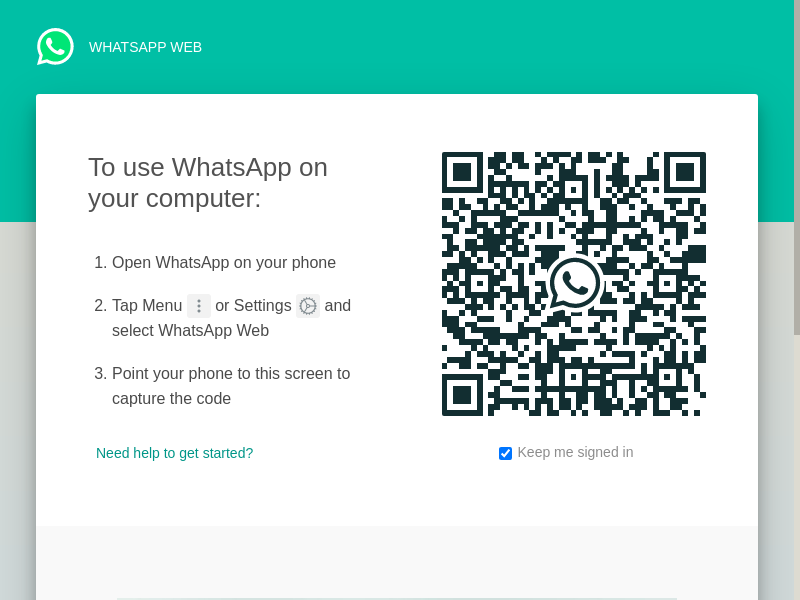

Scan QR terus pencet enter

logged in


In [ ]:
#Login whatsapp web
from IPython.display import Image 

#Changing User Agent
driver = webdriver.Chrome('chromedriver',options=chrome_options)
print(driver.execute_script("return navigator.userAgent;"))
driver.execute_cdp_cmd('Network.setUserAgentOverride', {"userAgent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'})
print(driver.execute_script("return navigator.userAgent;"))

wait = WebDriverWait(driver, 20)
driver.get("https://web.whatsapp.com")
time.sleep(2)
QR_xpath = "/html/body/div/div/div/div[2]/div[1]/div/div[2]/div/canvas"
QR_wait = wait.until(EC.presence_of_element_located((By.XPATH, QR_xpath)))
driver.save_screenshot("screenshot.png")
pil_img = Image(filename='screenshot.png')
display(pil_img)
time.sleep(2)
print("Scan QR terus pencet enter")

input()
print("logged in")

In [ ]:
#Using existing sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
send_xpath = "/html/body/div/div/div/div[4]/div/footer/div[1]/div[3]"

sheet = gc.open(namaSpreadSheet)
worksheet = sheet.worksheet(tabSheet)

rows = worksheet.get_all_values()
line = 0

for i in rows:
  try:
    #if line == 0:
     # line+=1
    #else:
      API_tmp = i[kolomAPI]
      API_oke = API_tmp.replace("api.whatsapp.com","web.whatsapp.com")
      #Print(API_oke)
      driver.get(API_oke)
      wait_button = wait.until(EC.presence_of_element_located((By.XPATH, send_xpath)))
      send_button = driver.find_element_by_xpath(send_xpath)
      time.sleep(1)
      send_button.click()
      print('successfully sent')
      worksheet.update_cell(line+1, column, 'Berhasil!')
      time.sleep(3) #waktu kirim
      line+=1
  except Exception as e:
    print('failed to sent')
    worksheet.update_cell(line+1, column, 'Gagal')
    print(e)
    line+=1


successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent
successfully sent


In [ ]:
driver.quit()